### In Collaboration with Ryan Fazal, Darnell Regis & Marc Suda

### Heart Disease UCI

For this project, I decided to use the logistic regression to predict my findings.

My job is to build a classifier using logistic regression for this data.

First, I must download the "heart" data from the Heart Disease UCI provided on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci/version/1

The data will be uploaded to this file


### Context of the Heart Disease UCI Dataset

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Goal

This dataset is known as the Heart Disease UCI. The purpose of this dataset, is to provide an insight as too if the patient has a heart disease. With the data provided, there are over 303 subjects. These subjects vary between the ages of 29 to 78. Under content, the dataset provides age, sex, chest pain type (4 values), resting blood pressure ,serum cholesterol in mg/dl, fasting blood sugar > 120 mg/dl, etc. Using this dataset, I plan to build a logistic regression model. The reason for this, is so that I can predict whether or not a patient is likely to develop a heart disease depending on a particular attribute such as their age with serum cholesterol in mg/dl levels . 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#heart.csv file

heart_df = pd.read_csv("heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
heart_df.rename(columns={'cp':'chest_pain_type', 'trestbps': 'resting_blood_pressure', 'chol':'serum_cholesterol', 'fbs':'fasting_blood_sugar', 'restecg':'resting_electroc_results', 'thalach':'max_heart_rate_achieved', 'exang':'exercise_induced_angina', 'ca':'no_of_mjrv_cf'}, inplace=True)

heart_df.head(304)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electroc_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,no_of_mjrv_cf,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
columns_rows = heart_df.shape
columns_rows


(303, 14)

In [6]:
heart_df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electroc_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,no_of_mjrv_cf,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
## Number of male/female in the dataset

male = len(heart_df[heart_df['sex'] == 1])
female = len(heart_df[heart_df['sex'] == 0])

print(f"Male: {male}")
print(f"Female: {female}")

Male: 207
Female: 96


In [8]:
## Number of patients with/without a heart disease

WithHeartDiseaseUCI = len(heart_df[heart_df['target'] == 1])
WithoutHeartDiseaseUCI = len(heart_df[heart_df['target'] == 0])
print(f"Patients with a heart disease: {WithHeartDiseaseUCI}")
print(f"Patients without a heart disease: {WithoutHeartDiseaseUCI}")

Patients with a heart disease: 165
Patients without a heart disease: 138


In [9]:
## Percentage of the ## Number of patients with/without a heart disease
patients = columns_rows[0]
WithHeartDiseaseUCI = (WithHeartDiseaseUCI / columns_rows[0]) * 100
WithoutHeartDiseaseUCI = (WithoutHeartDiseaseUCI / columns_rows[0]) * 100

print(f"Patients with a heart disease % is: {WithHeartDiseaseUCI:.2f}% ")
print(f"Patients without a heart disease % is: {WithoutHeartDiseaseUCI:.2f}%")

Patients with a heart disease % is: 54.46% 
Patients without a heart disease % is: 45.54%


In [10]:
y = heart_df.target.values
x = heart_df.drop(['target'], axis = 1)

x = (x - x.mean()) / x.std()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
print("The target accuracy is equal to: {:0.2f}%".format(logreg.score(x_test,y_test)*100))

The target accuracy is equal to: 83.61%


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
logreg.predict(x_test[0: 10])

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [12]:
predictions = logreg.predict(x_test)

performance = logreg.score(x_test, y_test)
print(f"The Heart Disease UCI performance is: {performance}")

The Heart Disease UCI performance is: 0.8360655737704918


In [13]:
logreg.fit(x_train, y_train)

/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

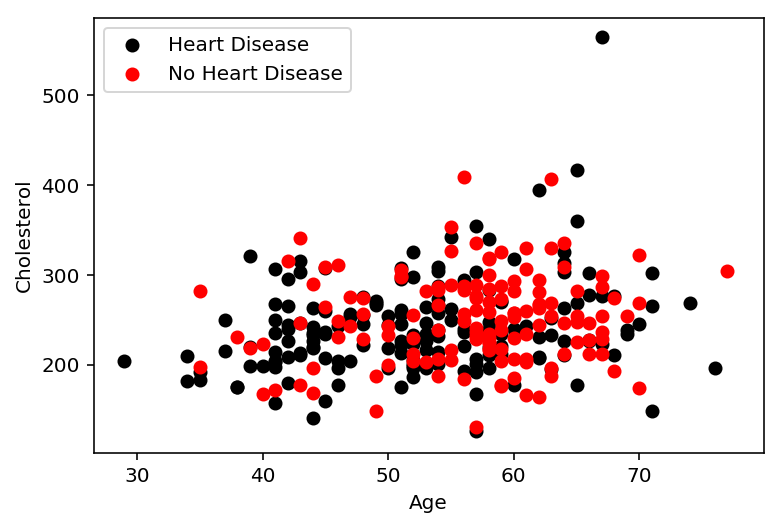

In [14]:
plt.scatter(x=heart_df.age[heart_df.target==1],y=heart_df.serum_cholesterol[(heart_df.target==1)], c="black")
plt.scatter(x=heart_df.age[heart_df.target==0],y=heart_df.serum_cholesterol[(heart_df.target==0)],c="red")
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

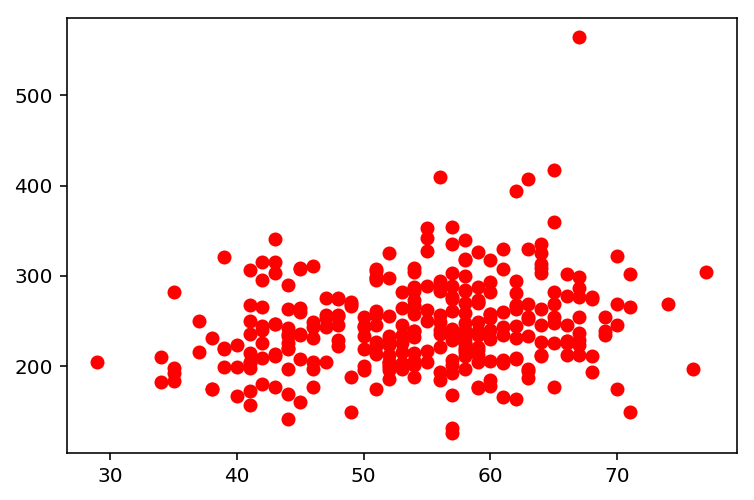

In [15]:
plt.scatter (heart_df.age,heart_df.serum_cholesterol,  color ="red" )

In [16]:
X_train, X_test, y_train, y_test = train_test_split(heart_df[['age']],heart_df.serum_cholesterol, test_size=0.1 )

In [17]:
logreg = LogisticRegression()

In [18]:
logreg.fit(X_train,y_train)

/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
logreg.predict(X_test)

array([197, 197, 212, 269, 269, 269, 269, 269, 269, 269, 269, 269, 269,
       269, 269, 269, 269, 269, 269, 269, 197, 269, 269, 269, 269, 269,
       269, 269, 269, 269, 269])

In [20]:
logreg.score(X_test,y_test)

0.0

In [21]:
logreg.predict_proba(X_test)

array([[0.00440203, 0.00364485, 0.00509271, ..., 0.004713  , 0.00434788,
        0.00490771],
       [0.00454198, 0.003846  , 0.0051463 , ..., 0.00481797, 0.0044933 ,
        0.00498759],
       [0.00426257, 0.00345109, 0.00503533, ..., 0.00460624, 0.00420339,
        0.0048249 ],
       ...,
       [0.00312201, 0.00208975, 0.00440408, ..., 0.00365059, 0.00303698,
        0.00402053],
       [0.0035125 , 0.00251412, 0.00465436, ..., 0.00399456, 0.00343329,
        0.00432223],
       [0.00331522, 0.00229467, 0.00453262, ..., 0.00382301, 0.00323268,
        0.00417336]])

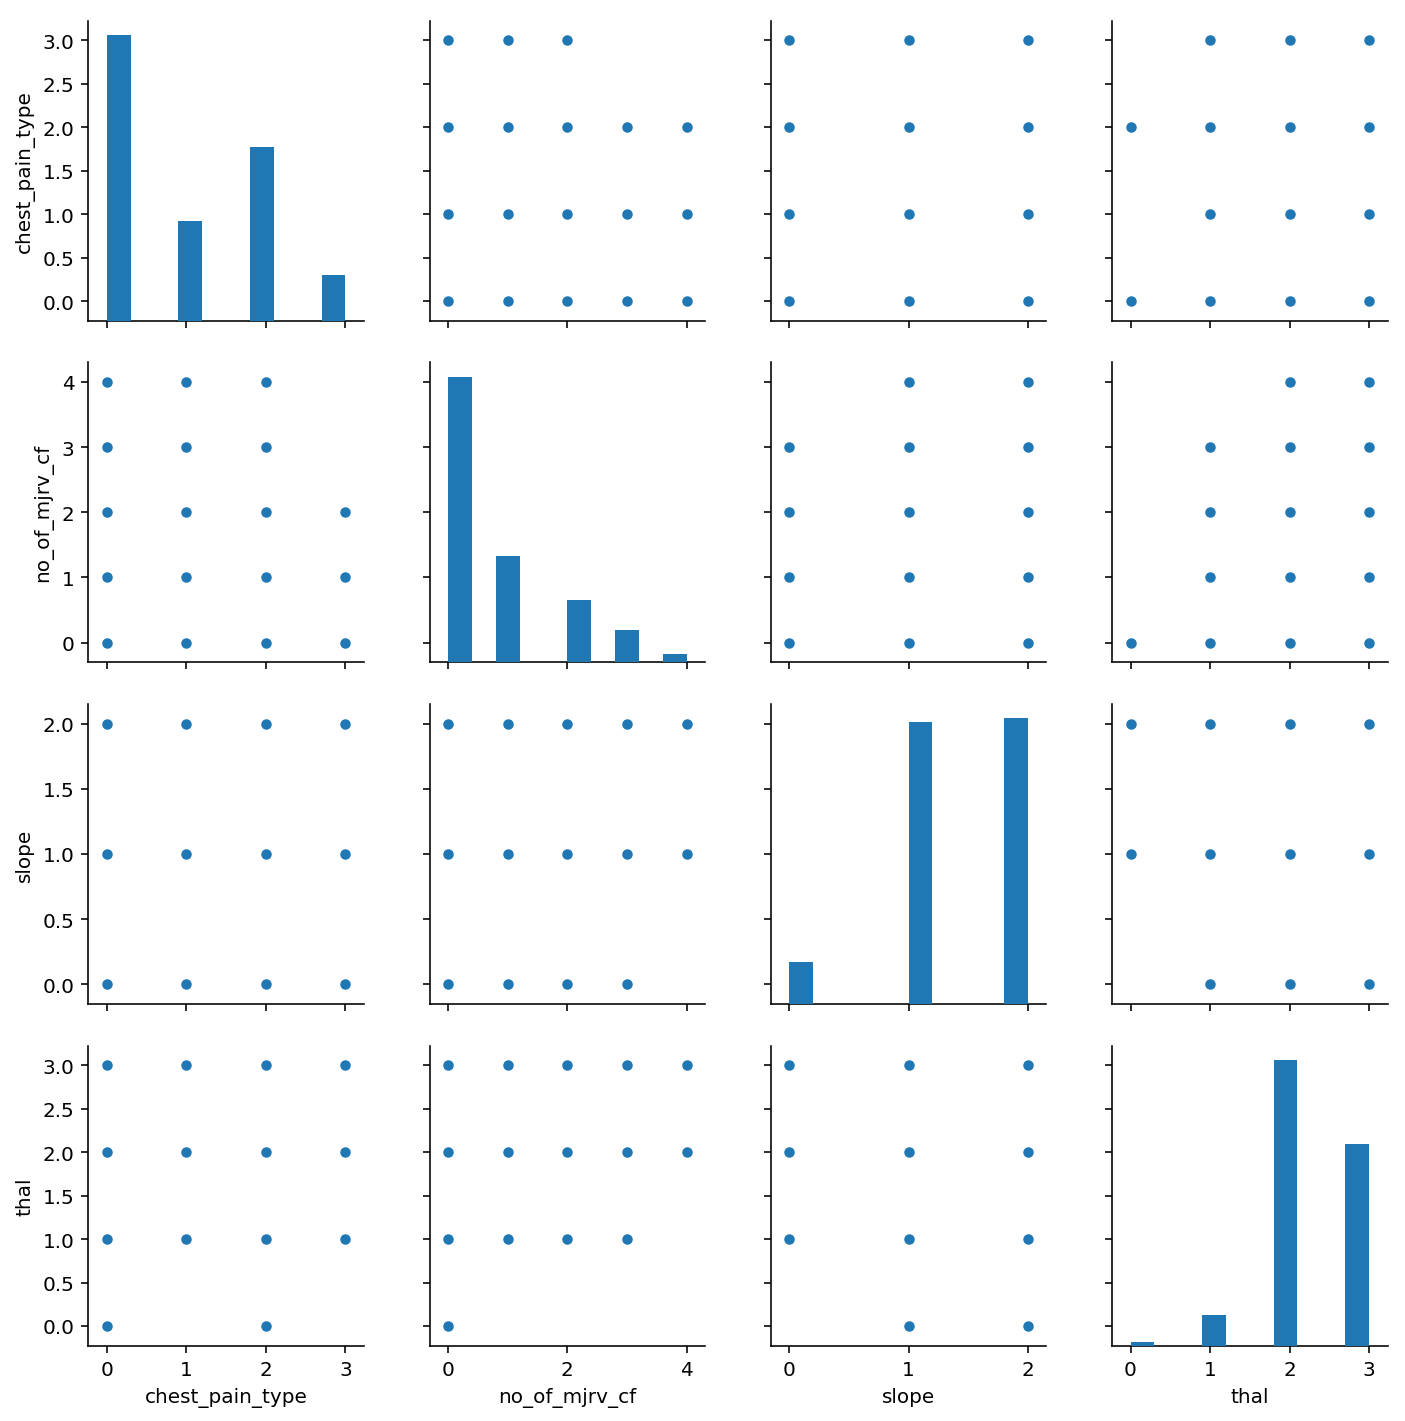

In [22]:
## Seaborn Pairplot

import seaborn as sns

sns.pairplot(heart_df, vars=["chest_pain_type", "no_of_mjrv_cf","slope","thal"], )

/ext/anaconda5/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/ext/anaconda5/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/ext/anaconda5/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


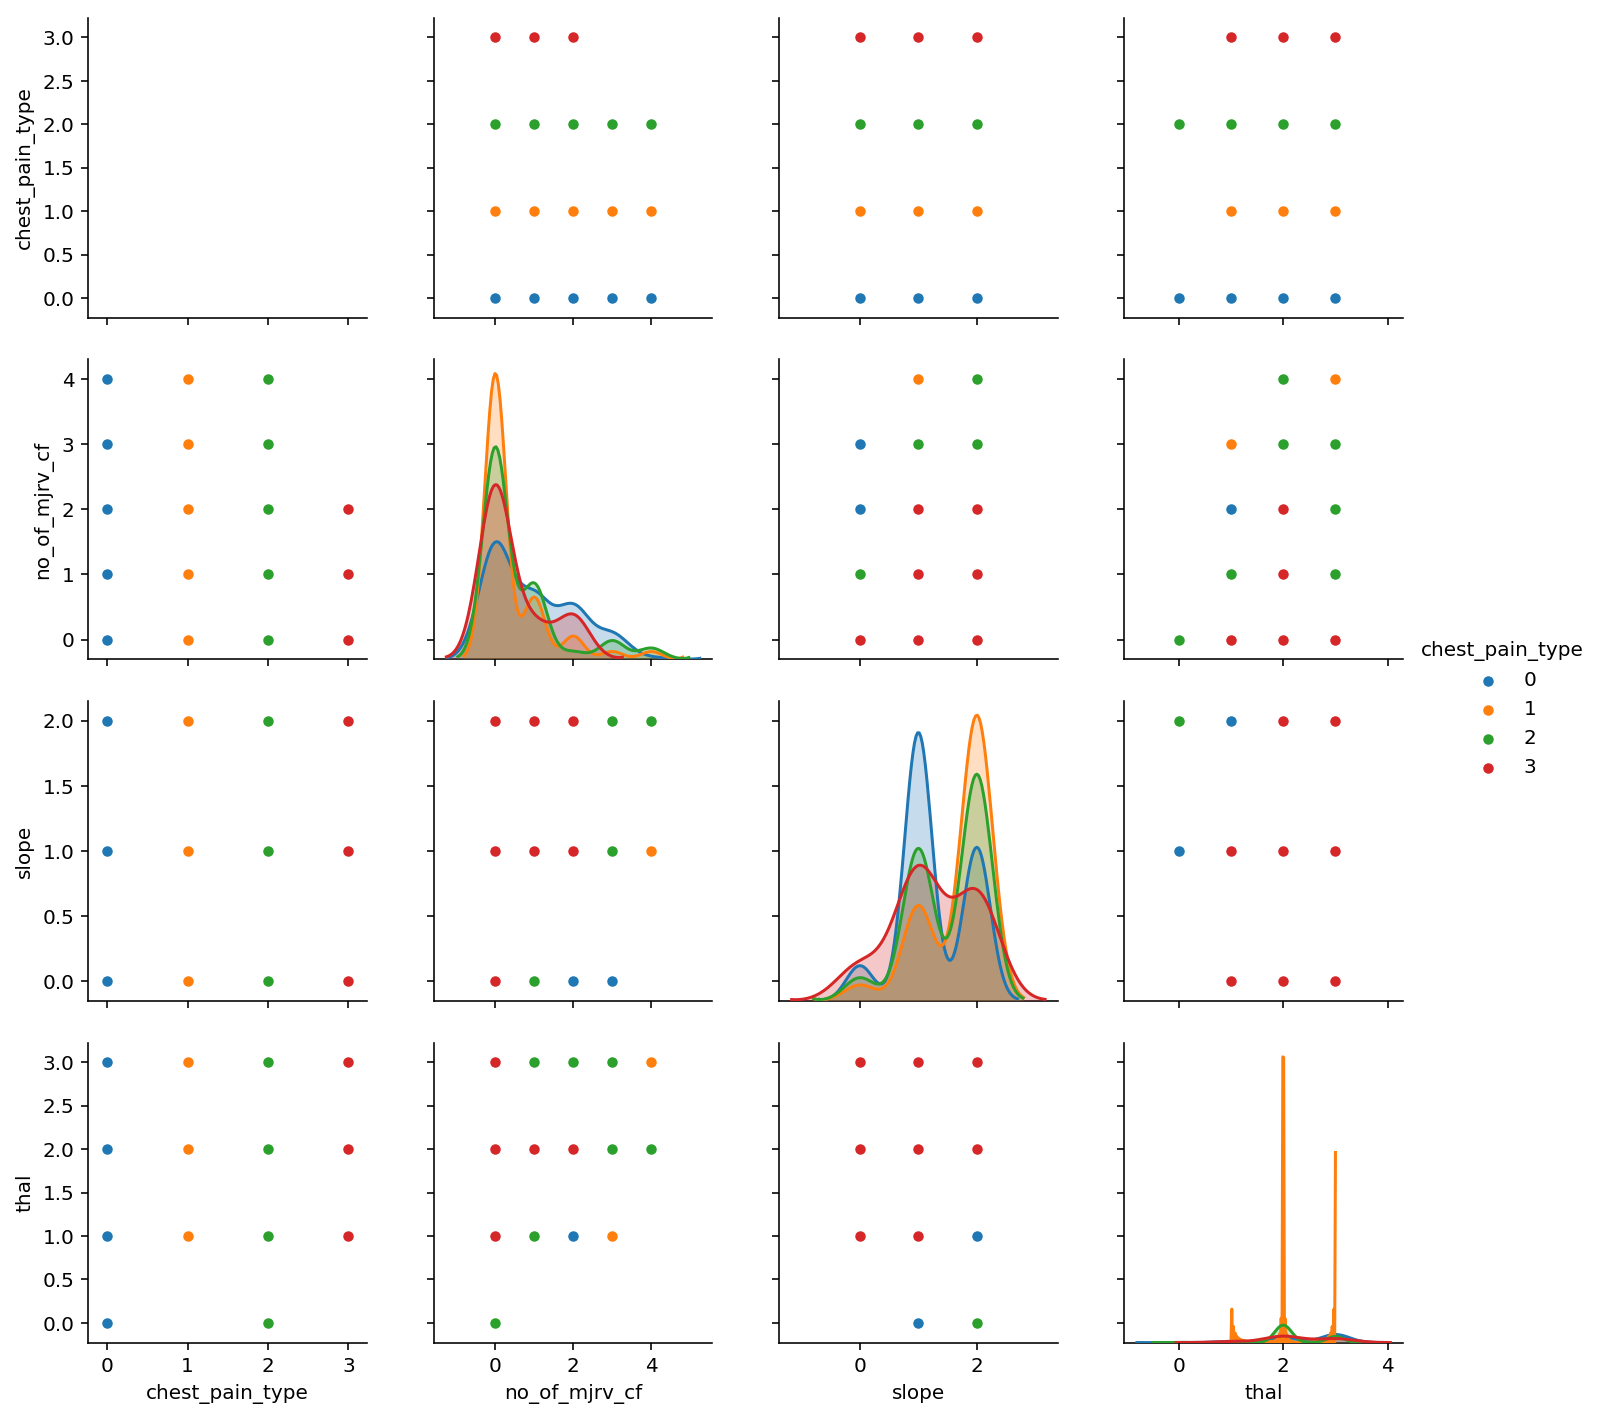

In [23]:
sns.pairplot(heart_df, vars=["chest_pain_type", "no_of_mjrv_cf","slope","thal"], hue='chest_pain_type')

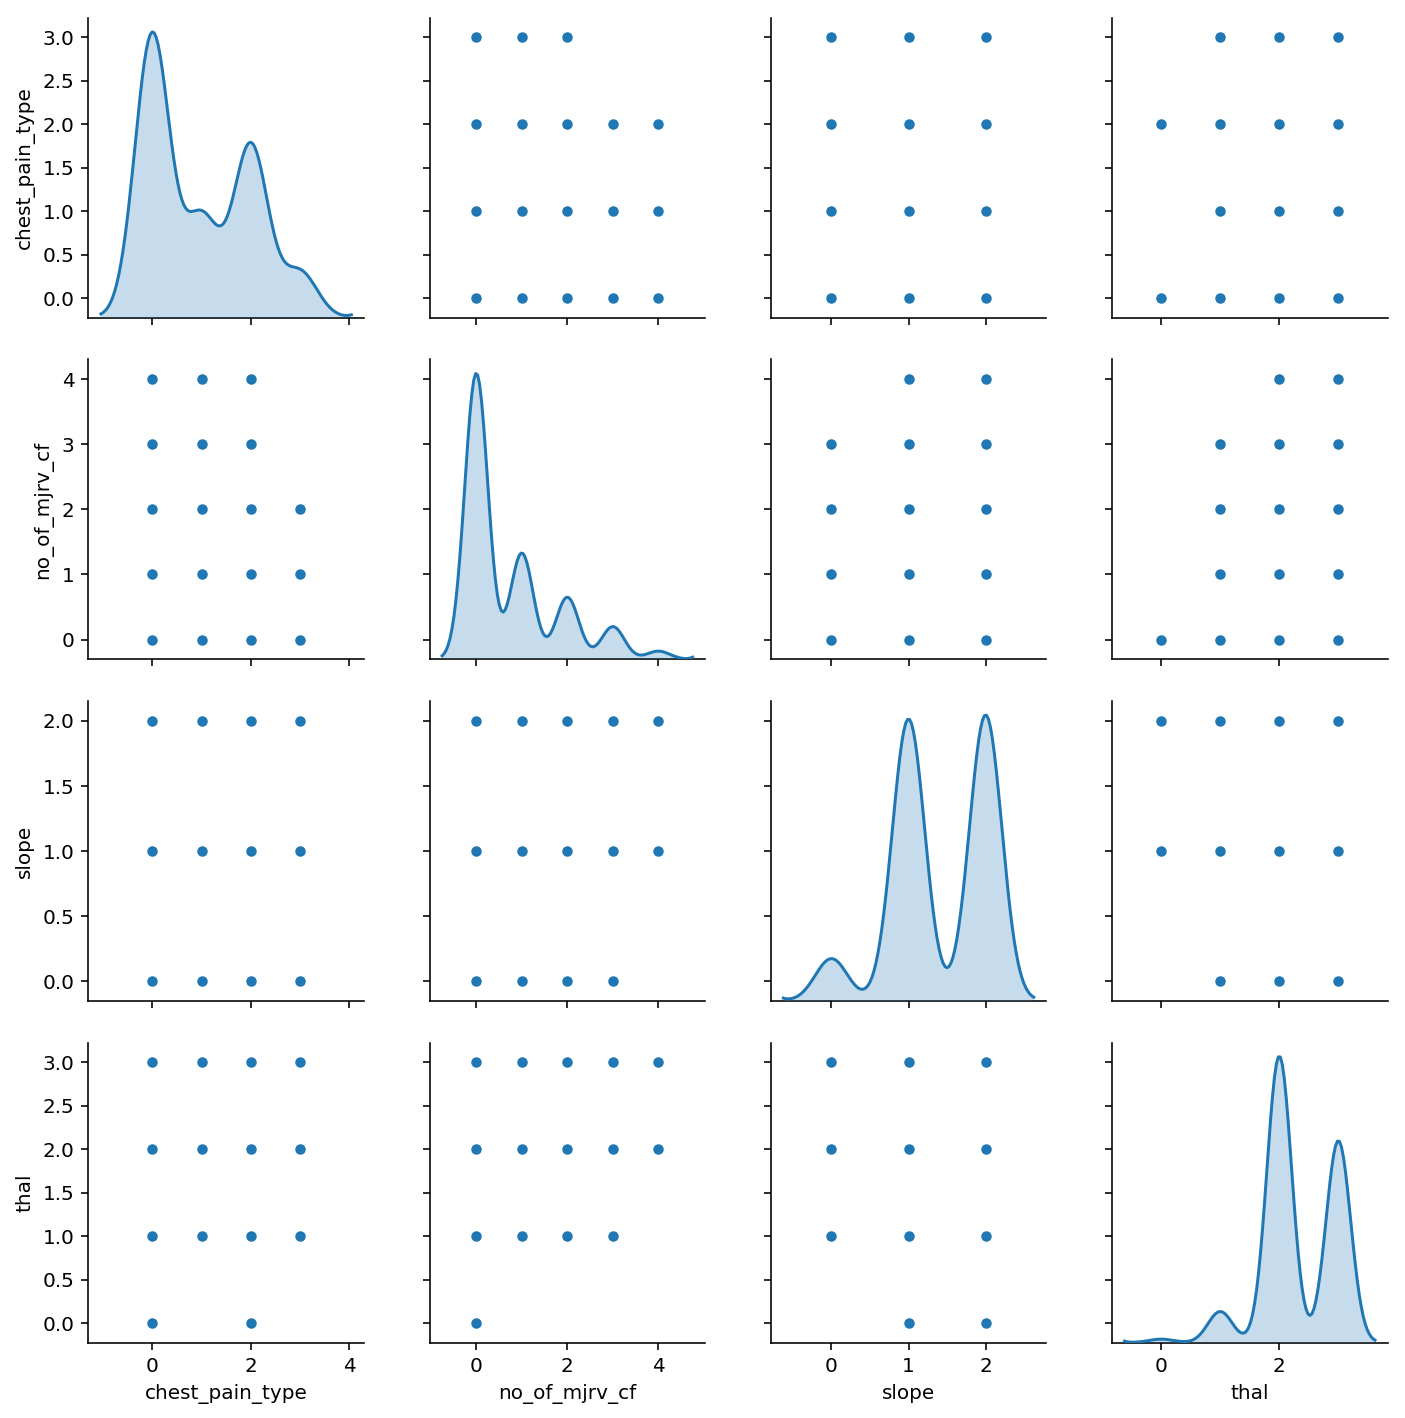

In [24]:
sns.pairplot(heart_df,diag_kind='kde', vars=["chest_pain_type", "no_of_mjrv_cf","slope","thal"])

/ext/anaconda5/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/ext/anaconda5/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/ext/anaconda5/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


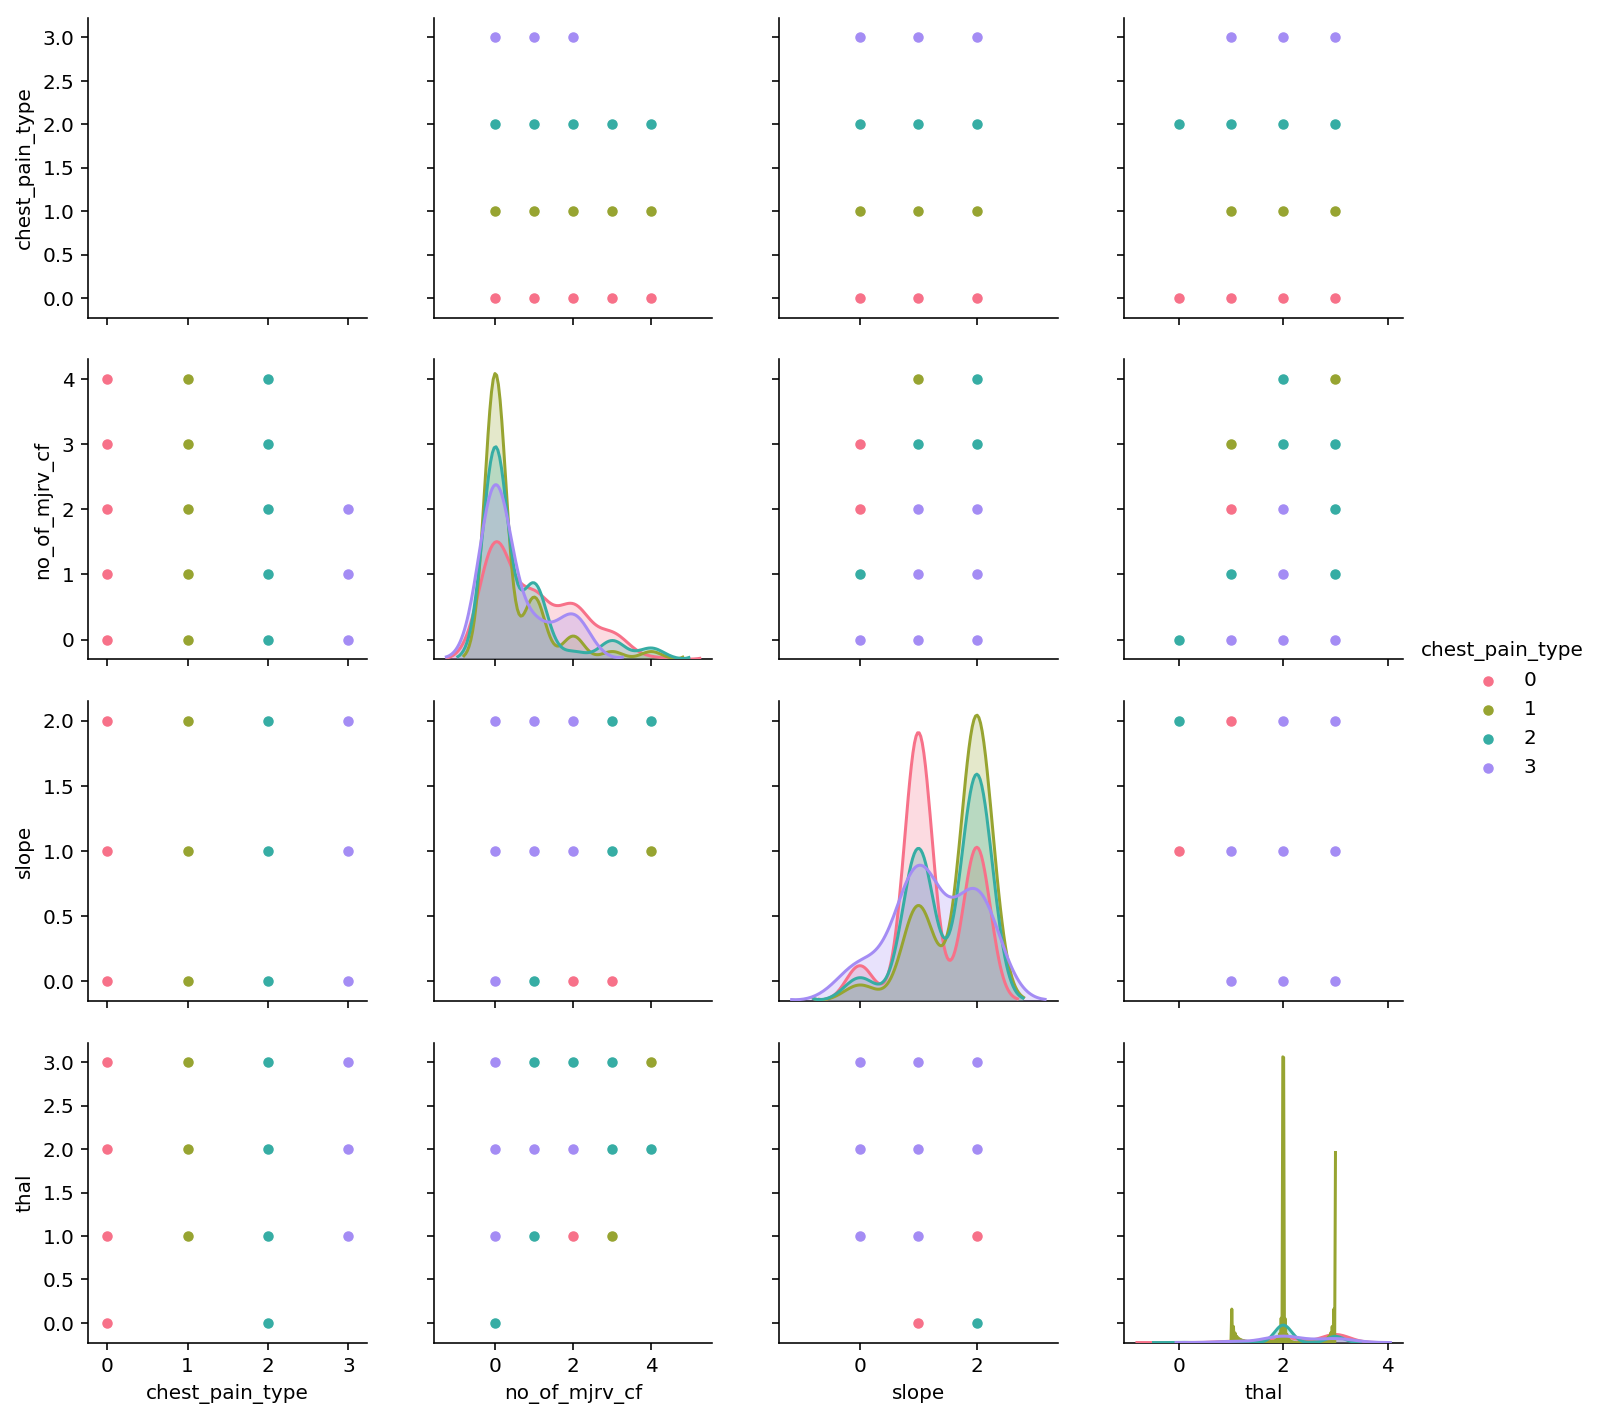

In [25]:
sns.pairplot(heart_df,diag_kind='kde', palette='husl',hue='chest_pain_type', vars=["chest_pain_type", "no_of_mjrv_cf","slope","thal"])

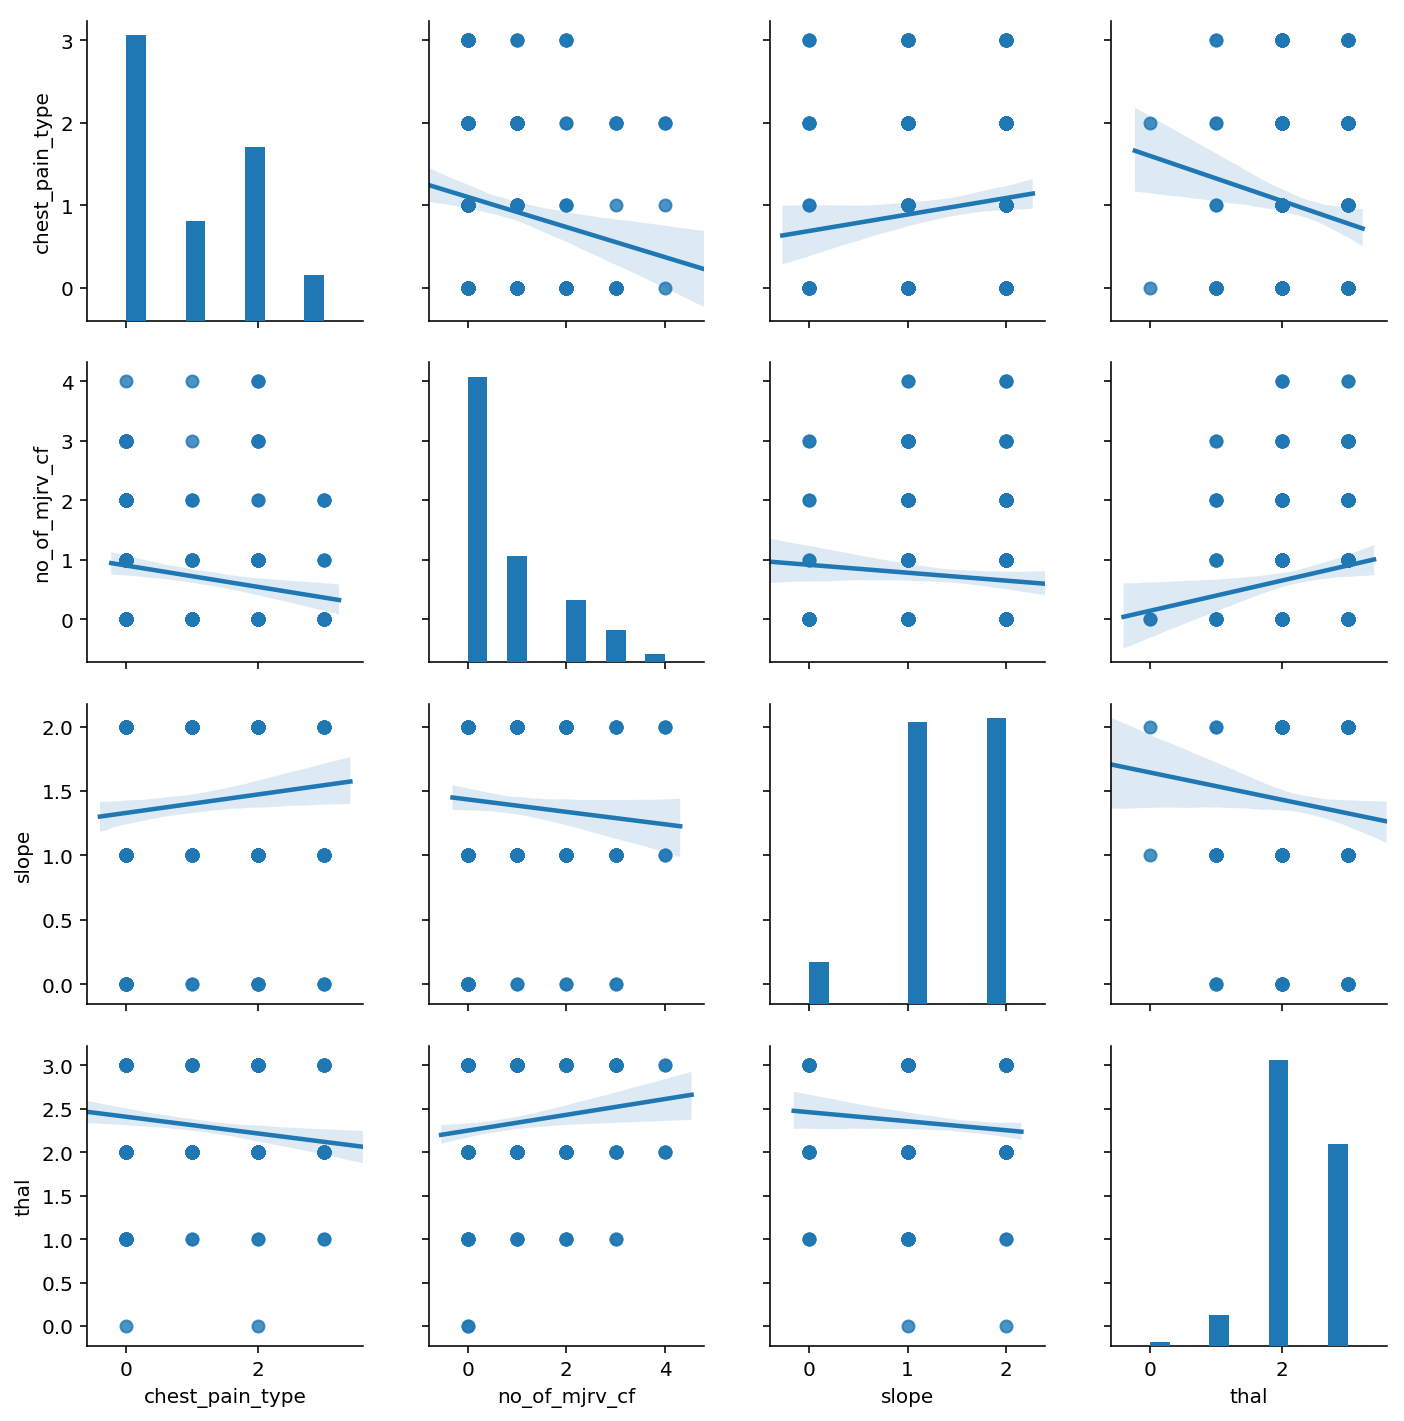

In [26]:
sns.pairplot(heart_df,kind='reg', vars=["chest_pain_type", "no_of_mjrv_cf","slope","thal"])

/ext/anaconda5/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/ext/anaconda5/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/ext/anaconda5/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


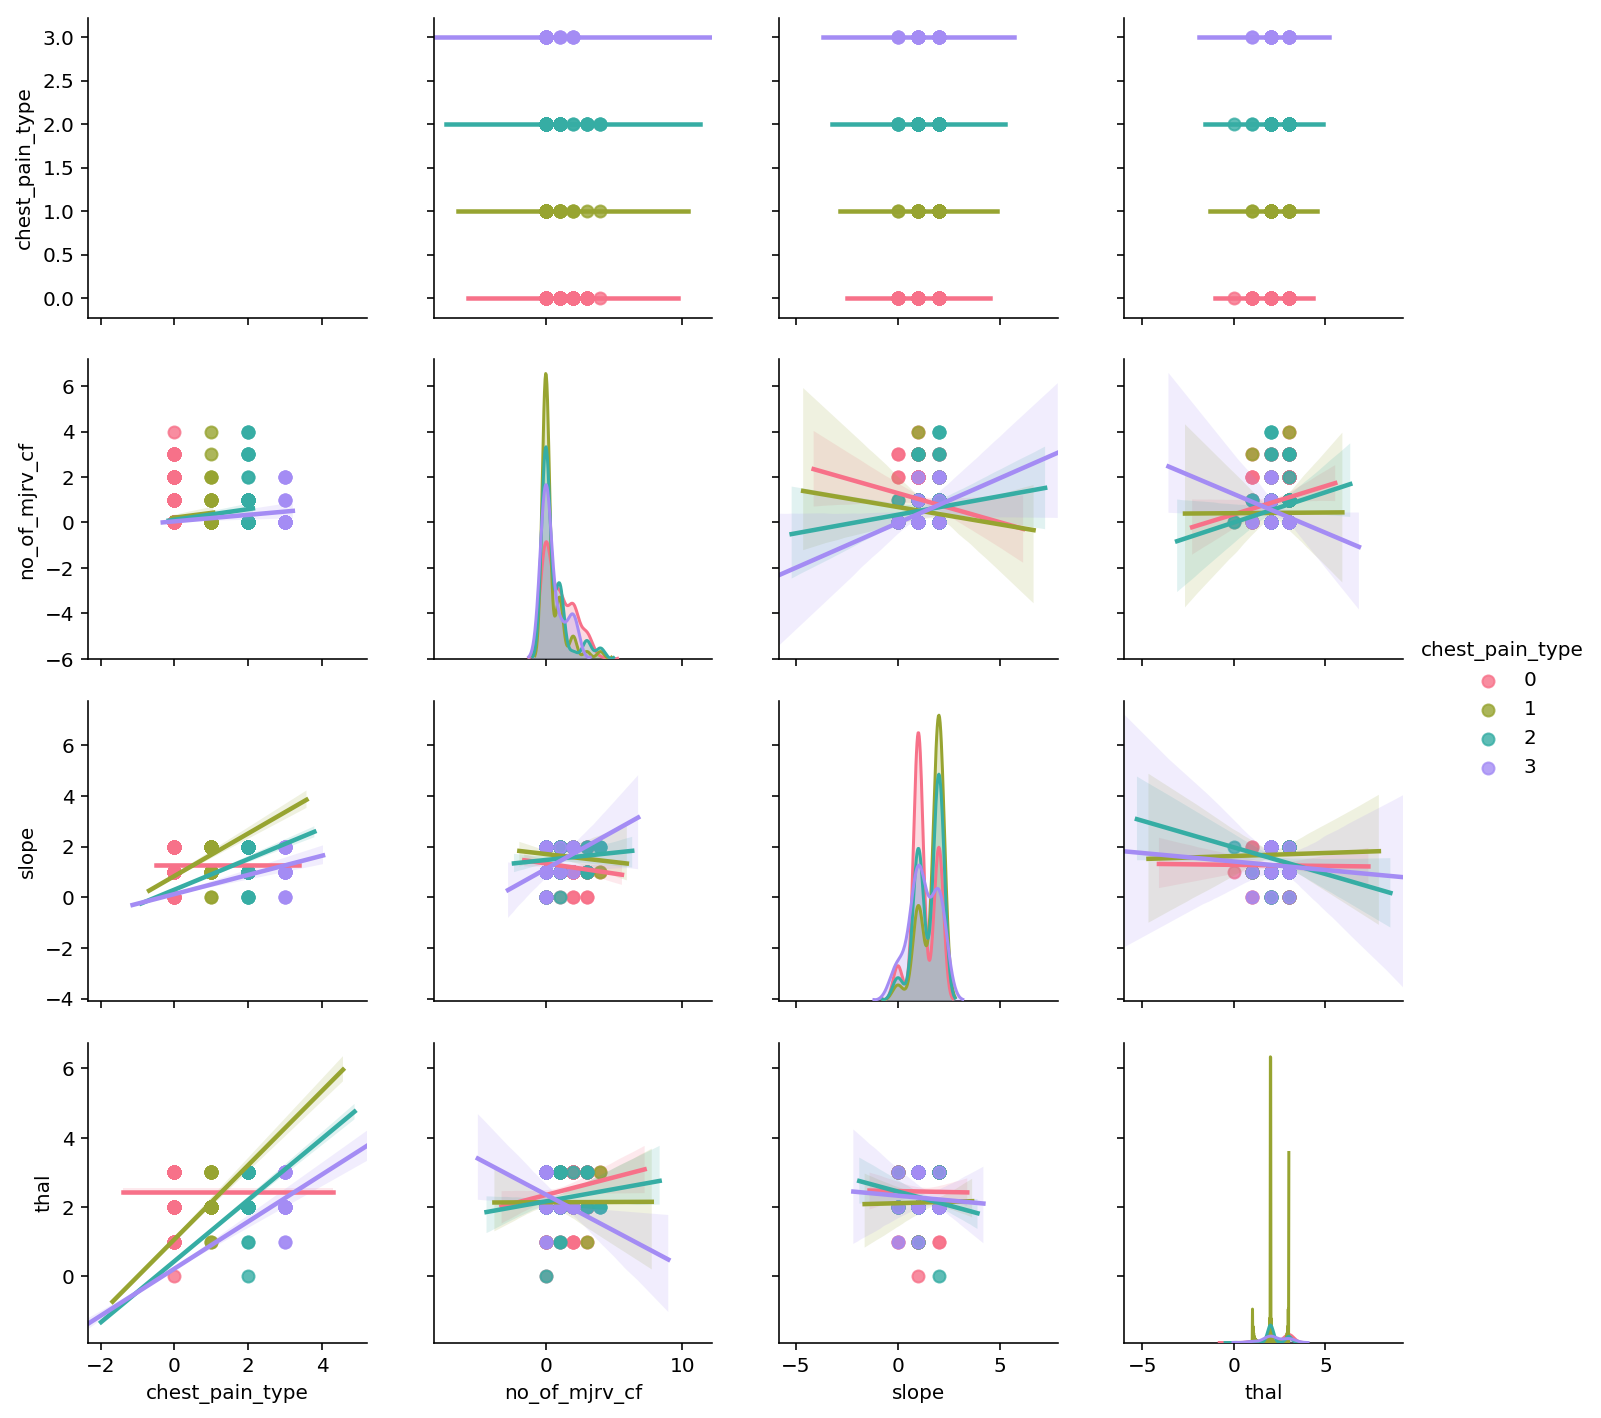

In [27]:
sns.pairplot(heart_df,diag_kind='kde',kind='reg', palette='husl',hue='chest_pain_type', vars=["chest_pain_type", "no_of_mjrv_cf","slope","thal"])

In [28]:
##One Hot Encoding
heart_df = pd.DataFrame({'chest_pain_type': ['typical angina', 'atypical angina', 'non-anginal pain','asymptomatic']})

In [29]:
pd.get_dummies(heart_df,prefix=['chest_pain_type'])

,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina
0,0,0,0,1
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0


In [30]:
pd.get_dummies(heart_df,prefix=['chest_pain_type'], drop_first=True)

,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,0


In [31]:
heart_df["chest_pain_type"] = heart_df["chest_pain_type"].astype('category',categories=['typical angina', 'atypical angina', 'non-anginal pain','asymptomatic'])

pd.get_dummies(heart_df,prefix=['chest_pain_type'])

/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  if __name__ == '__main__':


,chest_pain_type_typical angina,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_asymptomatic
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [32]:
##PCA Data
import pandas as pd
from sklearn.decomposition import PCA
data = pd.read_csv("heart.csv", header = None)## There actually *is* a header here



X = data.values[:,:-1]
y = data.values[:,-1]

X[:5]


pca.fit(X)
        


print(pca.explained_variance_ratio_) 

NameError: name 'pca' is not defined

In [0]:
set(y)

In [0]:
np.histogram(heart_df.chest_pain_type, bins=10, range=None, normed=None, weights=None, density=None)